In [ ]:
# Install Model Zoo client library
!pip install modelzoo-client[transformers]

In [2]:
# Import library transformers
import transformers
pipeline = transformers.pipeline("text-generation")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 789.1/789.1 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.0 MB/s eta 0:00:00
  Created wheel for names: filename=names-0.3.0-py3-none-any.whl size=803682 sha256=5eb96633ae01e3de87a2dd50325a25c70bd5ce3037301c0fab3b6b3c3118f692
  Stored in directory: /root/.cache/pip/wheels/fc/9a/6f/78f4282bbcaa2d8c678b73c54c0bb1b7a04009f0d7cec79fce
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4832 

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [3]:
# Model BERT Sentiment Classification

from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

pretrained= "mdhugol/indonesia-bert-sentiment-classification"
model = AutoModelForSequenceClassification.from_pretrained(pretrained)
tokenizer = AutoTokenizer.from_pretrained(pretrained)

sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [4]:
label_index = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

sentence = "senyumnya itu lhooo #Coldplay https://tco/sDepOUWLDn"

result = sentiment_analysis(sentence)
status = label_index[result[0]['label']]
score = result[0]['score']
print(f'Sentence: {sentence} | Label : {status} ({score * 100:.3f}%)')

Sentence: senyumnya itu lhooo #Coldplay https://tco/sDepOUWLDn | Label : neutral (67.374%)


In [5]:
# load data

import pandas as pd

def convert_dtype(x):
    if not x:
        return ''
    try:
        return str(x)   
    except:        
        return ''

df = pd.read_csv('coldplay_tweets.csv', encoding='latin', sep=',' , error_bad_lines=False)
print
df.head()

<ipython-input-5-7418568c9218>:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('coldplay_tweets.csv', encoding='latin', sep=',' , error_bad_lines=False)


,Date,Tweets
0,2023-05-14 21:41:38+00:00,Wish me luck trying to get tickets for Coldpla...
1,2023-05-14 20:26:00+00:00,SUKAAA SEJARAH TERBENTUKNYA COLDPLAY https://t...
2,2023-05-14 19:04:42+00:00,yang ada nanti kalian yang dibubarin sama fans...
3,2023-05-14 18:57:53+00:00,info yang mau nge war coldplay mau section aph
4,2023-05-14 17:36:51+00:00,@VIVAcoid @coldplay lihat ini kawan


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1184 non-null   object
 1   Tweets  1184 non-null   object
dtypes: object(2)
memory usage: 18.6+ KB


In [7]:
del(df['Date'])

In [8]:
print(df.shape)

(1184, 1)


In [9]:
# Membuat skrip untuk memeriksa sentimen setiap tweet, lalu menyimpan hasilnya ke variabel result
result = sentiment_analysis(df['Tweets'].tolist())

# Menunjukkan jumlah tweet
print(f'Total tweets: {len(result)}')

Total tweets: 1184


In [10]:
# Membuat kolom baru pada dataframe untuk menyimpan hasil sentimen
df['sentiment'] = [label_index[i['label']] for i in result]
df['score'] = [i['score'] for i in result]

# Memfilter dataframe untuk menunjukan kolom Tweet, sentiment, dan skor sentiment
df = df[['Tweets', 'sentiment', 'score']]

# Menyimpan hasil pada file CSV
df.to_csv('result_coldplay_tweets.csv', index=False)

# sentimen keseluruhan dengan skor dan persentase dari setiap sentimen (concat dengan %)
df['sentiment'].value_counts().to_frame().assign(
    percentage = lambda x: (x['sentiment'] / x['sentiment'].sum()) * 100
).style.format({'percentage': '{:.2f}%'})

,sentiment,percentage
neutral,593,50.08%
negative,330,27.87%
positive,261,22.04%


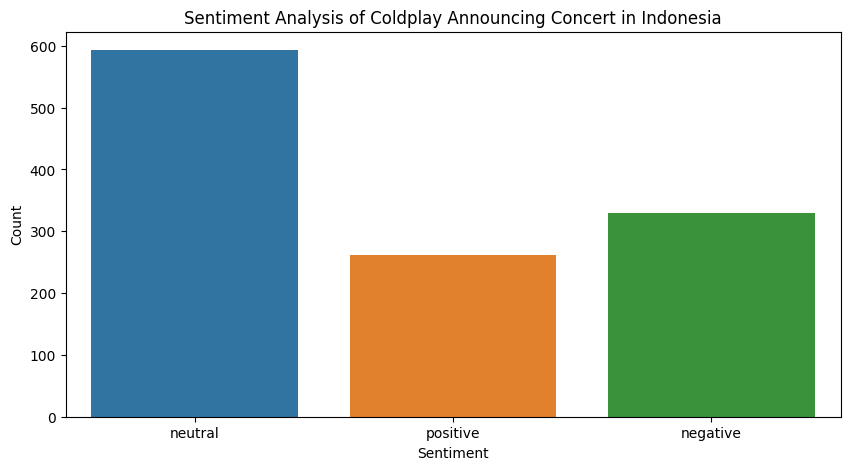

In [14]:
# Membuat visualisasi untuk analisis sentimen

import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur ukuran gambar
plt.figure(figsize=(10, 5))

# Membuat barplot
sns.countplot(x='sentiment', data=df)

# Membuat judul
plt.title('Sentiment Analysis of Coldplay Announcing Concert in Indonesia')

# Menentukan label x dan y
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Menampilkan plot
plt.show()

In [15]:
# Membuat top 10 negative, positive, neutral tweet
from IPython.display import display, HTML

for sentiment in ['positive', 'neutral', 'negative']:
    print(f'Top 15 {sentiment} Tweets:')
    display(HTML(df[df['sentiment'] == sentiment].sort_values('score', ascending=False)['Tweets'].head(15).to_frame().to_html()))
    print('')

Top 15 positive Tweets:


,Tweets
906,@sweet_buddd dari segi view ke stage kurang banget ka tapi dapet semua view suasana stadion karena diujung soalnya cat 3 jg menurutku dismping banget pengalaman kemarin nonton BP tapi euforia itu pasti seru kok ka apalgi konser coldplay yang sering diliat tuh euforianya juara
581,Tbtb dikasih tuhn jodoh terus diajak nonton coldplay enak kali y 
731,Tapi memang Coldplay era gospel mega curch lebi banyak disukai khalayak ramai Ya alhamdulillah to lur sopo ngerti makin banyak orang indonesia yang tertarik masup kresten setelah nonton coldplay
106,karena udah biasa ngejar artis ampe ke LN walo mentok SG or Jepun Coldplay hype ini lbh ke bangga akhirnya makin banyak artis kelas dunia yang lirik indonesia buat gelar konser jangankan Coldplay Fujii Kaze konser di JKT aja uda seneng
1096,@txtsiaries @westenthu menurut gue kalo konser coldplay bukan nikmatin visualnya sih tapi lebih ke vibes konsernya mau lu duduk dimana aja pasti bakal seru
462,Iyaaaaa si yang paling coldplay
492,Murah lagi ticket Coldplay dari Kodaline
991,Bagi yang tumbuh remaja dan dewasa dengan lagu lagu Coldplay berita kepastian konsernya di Indonesia tentu bikin haru Uda siap war tiket uda pamit suami juga Kalo dapat alhamdulillah kalo ndak ya nangesss
782,Ini kalo beneran dapat tiket coldplay aku bakal nangesss keknya tiap hari
1059,OMOMOMOMOMO!!!!!!!belum ada maroon5 coldplay pun jadiilaah HEMAT HEMAT HEMAT LAGI YOOKKK



Top 15 neutral Tweets:


,Tweets
1027,mulai ini obrolan tiket coldplay di kantor
955,Buka slot jastip tiket coldplay yang penjualan tiket tgl 19 mei fee 200k aja Bisa dm #jastipcoldplay
546,@HaloBCA min bca xpresi bisa beli tiket coldplay ga? Buat tgl 17-18?
237,Di Konser Coldplay Nanti ada gak ya momen Vocalis minta penonton nyalakan Flash HP
642,@amanijalil Maybank or cimb bank boleh terima khas untuk peminat coldplay
811,Done post story coldplay buat buat minat
323,Sape lagi buat ticket service for coldplay?
1008,About to sell my MacBook Air M1 untuk pergi concert Coldplay
626,Gadai bpkb buat konser coldplay wkwkwk https://tco/2anLoLMu9m
914,Tebak capres yang dateng ke kongser coldplay yuk



Top 15 negative Tweets:


,Tweets
488,@AgsD_wf Si anying wkwkwkw dia pikir coldplay cuma nyanyi my universe aja apa? Gila ya hatinya busuk banget ya kalo miskin cara miskin aja mba udah
127,Emng coldplay kesinu mau ngajrin lgbt ya?otak para kadrun asuh ini ga tau dmnadiburi*t kali mknya isi otaknya busuk2
212,Coldplay jelek
222,@tanyakanrl duh pinter dikit lah! lo liat itu Webnya Coldplay Indonesia emangnya ada disana kayak gini sampah banget!
395,Konser Coldplay lebay ah Tai ky pada ngerti aja lo pada
173,Coldplay di blacklist LGBT bisa berhenti? Sempit banget logic nya
166,Galau banget mau Coldplay atau nunggu kabar BMTH
363,Bangsat sosmed isinya coldplay mulu
948,jijik banget semua story isi nya coldplay cuman kl dapat tiketnya gue gas juga
697,pala pusing banget semua coldplay
